<h1 align="center">
Research Proposal <br>
</h1>

<h5 align="center">
*Nathan Crock* <br>
December 22$^{nd}$, 2015 <br>
</h5>

<p align="center" style="padding: 0px 100px 0px 100px;">
I am proposing a research direction to address the problem posed by Monica during our recent discussions. Here is the problem statement as I understand it so far. Given a 3D scan of cortical astrocytes, can we determine the particular orientation of one astrocyte based on the location and orientation of its neighboring astrocytes? I propose we construct a voronoi mesh around the target astrocyte. I will show below, that this voronoi mesh will be a convex hull around the target astrocyte and that this hull will be a discrete, piece-wise linear approximation to the space that is "optimally far" from all neighboring astrocytes and "optimally close" to the target astrocyte.
</p>

<h3>Introduction</h3>

During recent discussions, Monica shared a hypothesis regarding the formation and relative positioning of neighboring astrocytes. In addition she expressed an interest in devising a quantifiable test to help validate its veracity. I will attempt to summarize the hypothesis in my own words here and then describe an experiment that I believe will accurately test the hypothesis. **Astrocytes express some form of chemical or molecular messengers which act as a deterrent to other astrocytes. As a result, astrocytes will try to align themselves maximally far away from one another.** To test this hypothesis we will need two things. Firstly we will need a formal definition of what it means to be "optimally far" from neighboring astrocytes and "optimally close" to the target astrocyte. Let us simply call this region the "optimal region". And secondly, we will need a method to test this hypothesis on the datasets provided by Monica and James. I have an idea for both.

<h3>Methodology</h3>

<h5>Optimal Region</h5>

I propose that the "optimal region" or space that the target astrocyte should occupy given its neighbor's positions should be the region enclosed around the target astrocyte by the voronoi mesh constructed using the astrocyte's centroids. Given a set of unordered points, a voronoi mesh is created by connecting the midpoints of all of the lines between one point and its neighbors. I will demonstrate with a 2 dimensional example below.

First we create 5 points in the region $[-5,5]\times[-5,5]$. These will be the centroids of the neighboring astrocytes.

In [6]:
import numpy as np
xpoints = np.array([-4.,-2.,3.,2.,0.])
ypoints = np.array([0.,3.,4.,-1.,-3.])

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

(-5, 5)

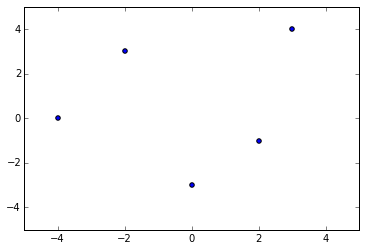

In [8]:
plt.scatter(xpoints, ypoints)
plt.xlim((-5,5)); plt.ylim((-5,5))

Above, we see 5 points. These indicate the centroids of astrocytes. We will use the origin, i.e. $(0,0)$, as the target astrocyte. Thus we will construct the voronoi region around the origin.

(-5, 5)

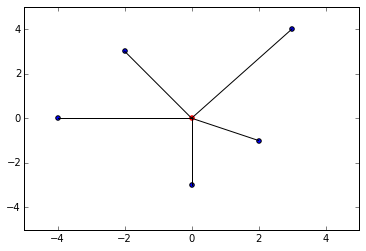

In [9]:
plt.scatter((0),(0), color="red")
plt.scatter(xpoints, ypoints)
for pt in zip(xpoints,ypoints):
    plt.plot((0,pt[0]),(0,pt[1]),color="black")
plt.xlim((-5,5)); plt.ylim((-5,5))

The target astrocyte is drawn in red. To help us visualize how the voronoi mesh is constructed we drew a line connecting the target astrocyte to each of its neighbors. Next we will mark the midpoint of each line with a green dot. These will form the vertices of the voronoi mesh.

(-5, 5)

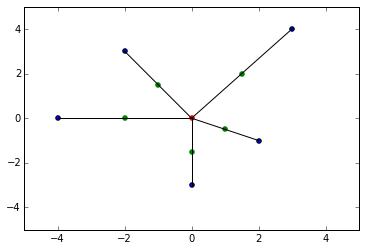

In [16]:
plt.scatter((0),(0), color="red")
plt.scatter(xpoints, ypoints)
vpts = []
for pt in zip(xpoints,ypoints):
    plt.plot((0,pt[0]),(0,pt[1]),color="black")
    plt.scatter((pt[0]/2),(pt[1]/2),color="green")
plt.xlim((-5,5)); plt.ylim((-5,5))

Lastly, by connecting all of these vertices with green lines we will have the voronoi region around the origin marked off by the perimeter of green lines.

(-5, 5)

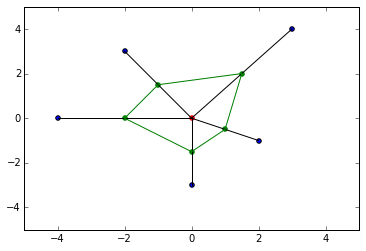

In [19]:
plt.scatter((0),(0), color="red")
plt.scatter(xpoints, ypoints)
for i,pt in enumerate(zip(xpoints,ypoints)):
    plt.plot((0,pt[0]),(0,pt[1]),color="black")
    plt.scatter((pt[0]/2),(pt[1]/2),color="green")
    plt.plot((pt[0]/2,xpoints[i-1]/2),(pt[1]/2,ypoints[i-1]/2),color="green")
plt.xlim((-5,5)); plt.ylim((-5,5))

In the figure above the red point represents the target astrocyte whose "optimal region" we would like to determine. The blue points are neighboring astrocytes. The region enclosed in green is the voronoi region around the target astrocyte which I am proposing we call the "optimal region" for the target astrocyte.

<h5>How to Test the Dataset</h5>

If we use the above definition as the "optimal region" for an astrocyte to occupy then we can test this against the datasets obtained by James and Monica by seeing how much of each astrocyte is within these regions. We can determine this using the following method.

1. Use a density based clustering algorithm on a thresholded version of the dataset to determine which points belong to which astrocyte. The threshold will be set to determine which points are astrocytes and which are background. Gordon has already developed one of these in the past during our earlier research. It is written in Python and is super fast. We can apply this to the 3D dataset and specify that we want $n$ clusters, where $n$ is equal to the number of astrocytes that we have predetermined to be within the data set.

2. Once we have identified which points in the dataset belong to which astrocyte we next need to determine how many of each of its points are within its "optimal region". We can do this by taking each point one at a time and testing whether it is within the boundary circumscribed by the voronoi region. The exact details of implementation can be determined later, but essentially the algorithm will go as follows.
        -For each point belonging to the target astrocyte do the following:
        -Find the 3 closest voronoi vertices.
        -Construct a plane in 3D using the 3 vertices. 
        -Evaluate the plane at the point in question. 
        -The sign of the result will tell us whether the point is inside or outside of the voronoi region.
3. Finally we can do some statistics on the results to describe more accurately what is going on. Most simply we would say something like (num pts inside)/(total pts) to get a percentage describing how much the astrocyte is within the "optimal region". We could also examine the distance of all the points outside the region to get some sort of error measure. I'm sure there are many other interesting metrics we can devise using the above data.

<h3>Conclusion</h3>

I have personally implemented or have access to implementations of all the compuational ideas outlined in the above proposal. Therefore I believe that this would be a straight forward test to implement and run. After looking at a sample dataset provided by Monica and outlining the code myself, I believe the proposed idea could be implemented and run within a month. I welcome any ideas and criticims you may have.